<a href="https://colab.research.google.com/github/Reis25/AprendizadoDeMquinas/blob/master/Hand_on_AM_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boa noite clã,

Este é um tutorial basico de Machine Learning para iniciantes em LSTM. Você poderá aprender como implementar uma LSTM para o dataset seguindo o passo a passo do notebook. 

**Dataset**

Para este problema nos iremos tentar resolver um problema de predição de problemas relacionados a passagens aéreas. Neste dataset, encontraremos uma serie temporal onde para um dado mês do ano, a tarefa e predizer o número de problemas com passagens aérias em unidades de milhares. Os dados variam de Janeiro/1949 a Dezembro/1960 (12 anos), com 144 observações. O dataset está disponível no link: https://www.kaggle.com/andreazzini/international-airline-passengers.


In [1]:
import pandas
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [2]:
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


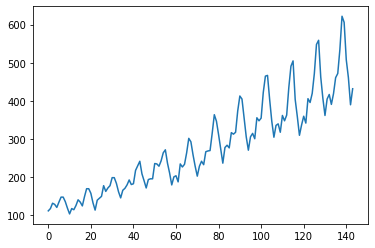

In [3]:
# Fazendo print da série no dataset;

import matplotlib.pyplot as plt

plt.plot(dataset)
plt.show()

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
numpy.random.seed(7)

In [7]:
# Inicialmente convertemos o nosso dataset em um array de uma dimensão.

dataset = dataset.values
dataset = dataset.astype('float32')

In [8]:
# Visualizando nossa transformação
dataset[:5]


array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

**Normalização**

Afim de uma melhor aprendizado da rede, realizaremos uma normalização nos dados. Podemos utilizar a classe MinMaxScaler para esta tarefa, onde a mesma consistem em modificar a escala do dados para um intervalo desejado (o até um número especificado). Logo para o nosso exemplo utilizaremos a escala de 0 até 1.

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
#Visualizando nosso conjunto de dados

dataset[:10]


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753]], dtype=float32)

**Separação dos dados**

Separando manualmente o dataset, escolheremos 2/3 para o conjunto de test e 1/3 para o conjunto de treinamento

In [13]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [18]:
print("Tamanho do dataset:",len(dataset))
print("Tamanho do conjunto de treino:",len(train))
print("Tamanho do conjunto de Teste:",len(test))

Tamanho do dataset: 144
Tamanho do conjunto de treino: 96
Tamanho do conjunto de Teste: 48


**Criação do dataset**

Agora nós podemos definir a função de criação do dataset. Essa função consiste de dois argumentos, o dataset e uma valor de **look back** (valor responsável por definir quantos elementos serãm usador para previsão). Por padrão definimos look back = 1. Logo para todo tempo t+1 tentaremos predizzer o mesmo somente com 1 valor t.

Exemplo : Para a série : 112, 118, 132, 129, 121, 135... usando o lookback = 1:

![lookback1.png](https://raw.githubusercontent.com/Reis25/Testes_py/master/lookback1.png)

paraa mesma base de dados (série) com o look back = 2, temos: 

![lookback2.png](https://raw.githubusercontent.com/Reis25/Testes_py/master/lookback2.png)

Criando a função em seguida temos: 

In [20]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0265
Epoch 2/100
94/94 - 0s - loss: 0.0126
Epoch 3/100
94/94 - 0s - loss: 0.0098
Epoch 4/100
94/94 - 0s - loss: 0.0089
Epoch 5/100
94/94 - 0s - loss: 0.0081
Epoch 6/100
94/94 - 0s - loss: 0.0073
Epoch 7/100
94/94 - 0s - loss: 0.0064
Epoch 8/100
94/94 - 0s - loss: 0.0055
Epoch 9/100
94/94 - 0s - loss: 0.0047
Epoch 10/100
94/94 - 0s - loss: 0.0041
Epoch 11/100
94/94 - 0s - loss: 0.0035
Epoch 12/100
94/94 - 0s - loss: 0.0030
Epoch 13/100
94/94 - 0s - loss: 0.0027
Epoch 14/100
94/94 - 0s - loss: 0.0024
Epoch 15/100
94/94 - 0s - loss: 0.0022
Epoch 16/100
94/94 - 0s - loss: 0.0021
Epoch 17/100
94/94 - 0s - loss: 0.0021
Epoch 18/100
94/94 - 0s - loss: 0.0020
Epoch 19/100
94/94 - 0s - loss: 0.0020
Epoch 20/100
94/94 - 0s - loss: 0.0019
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# inverte predição

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calcula Erro quadrado médio

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.78 RMSE
Test Score: 55.32 RMSE


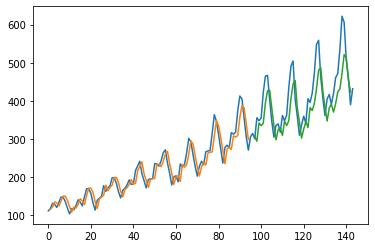

In [25]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predição de test

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()